Simple quick update latest weather

In [1]:
# Tell matplotlib to plot in line
%matplotlib inline

# import pandas
import pandas

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()

def smooth(data, thresh=None):
    
    means = data.mean()

    if thresh is None:
        sds = data.std()
    else:
        sds = thresh
    
    delta = data - data.shift()
    
    good = delta[abs(delta) < sds]

    #print(good.describe())
    
    return delta.where(good, 0.0)


In [2]:
infile = "../files/pijessie_weather.csv"

!scp 192.168.0.127:Adafruit_Python_BMP/weather.csv $infile

weather.csv                                   100%   13MB   6.4MB/s   00:02    


In [3]:
""" assume it is csv and let pandas do magic

  index_col tells it to use the 'date' column in the data
  as the row index, plotting picks up on this and uses the
  date on the x-axis

  The *parse_dates* bit just tells it to try and figure out
  the date/time in the columne labeled 'date'.
"""
data = pandas.read_csv(infile, index_col='date', parse_dates=['date'])
#data = smooth(data)

# smooth the data to filter out bad temps and pressures
#data.altitude = (smooth(data.altitude, 5.0).cumsum() + data.altitude[0])
#data.temp = (smooth(data.temp, 5.0).cumsum() + data.temp[0])

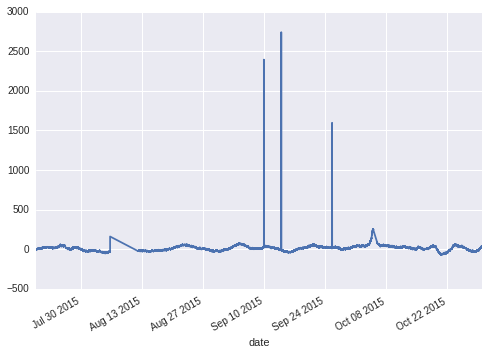

In [4]:
data.altitude.plot()

### Last 24 hours:

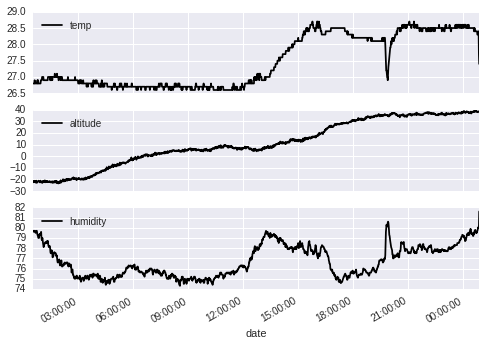

In [5]:
# reading is once a minute, so take last 24 * 60 readings
def plotem(data, n=-60):
    
    
    if n < 0:
        start = n
        end = len(data)
    else:
        start = 0
        end = n
        
    data[['temp', 'altitude', 'humidity']][n:].plot(subplots=True)
        
plotem(data, -24*60)

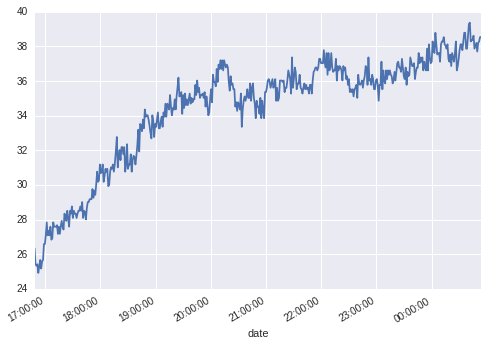

In [6]:
data.altitude[-8*60:].plot()

### Last week

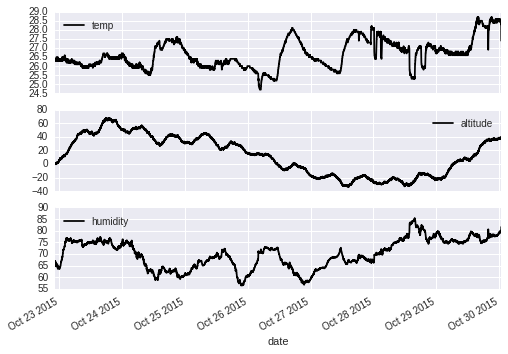

In [7]:
# reading is once a minute, so take last 7 * 24 * 60 readings
plotem(data, -7*24*60)

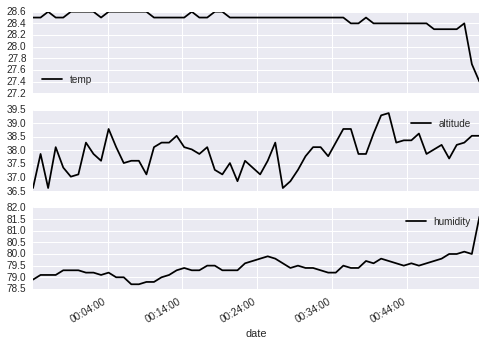

In [8]:
plotem(data)

## Look at all the data

In [9]:
data.describe()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
count,134436.000000,134436.000000,134436.000000,134436.000000,134430.000000,134430.000000
mean,27.861387,101168.977112,12.937777,101170.173919,68.160873,27.322403
std,1.599058,429.541753,33.097760,446.960346,9.849979,1.711857
min,22.300000,50042.000000,-73.255830,48765.000000,36.599998,1.200000
25%,27.000000,100935.000000,-10.068943,100937.000000,62.900002,26.400000
50%,28.000000,101151.000000,14.413017,101153.000000,69.199997,27.600000
75%,28.900000,101445.000000,32.352991,101447.000000,74.300003,28.500000
max,121.400000,117173.000000,2740.700691,102210.000000,98.000000,30.700001


In [10]:
data.tail()

,temp,pressure,altitude,sealevel_pressure,humidity,temp_dht
date,,,,,,
2015-10-30 00:49:37.821883,28.3,100873,37.699238,100872,80.000000,26.400000
2015-10-30 00:50:38.421900,28.3,100864,38.200590,100873,80.000000,26.400000
2015-10-30 00:51:39.022023,28.4,100869,38.284151,100865,80.099998,26.500000
2015-10-30 00:52:39.622038,27.7,100860,38.534838,100868,80.000000,26.500000
2015-10-30 00:53:40.206103,27.4,100864,38.534838,100869,81.599998,26.299999


I currently have two temperature sensors:

* DHT22 sensor which gives temperature and humidity.
* BMP180 sensor which gives pressure and temperature.

The plot below shows the two temperature plots.

Both these sensors are currently in my study.  For temperature and humidity I would like to have some readings from outside.  If I can solder them to a phone jack then I can just run phone cable to where they need to be.

**Below** plots the current values from these sensors.  This is handy for calibration.

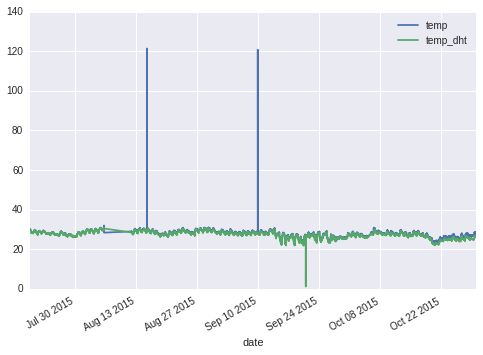

In [11]:
data[['temp', 'temp_dht']].plot()

## Dew Point

The warmer air is, the more moisture it can hold.  The *dew point* is
the temperature at which air would be totally saturated if it had as 
much moisture as it currently does. 

Given the temperature and humidity the *dew point* can be calculated, the actual formula is
pretty complex.

It is explained in more detail here: http://iridl.ldeo.columbia.edu/dochelp/QA/Basic/dewpoint.html

>If you are interested in a simpler calculation that gives an approximation of dew point temperature if you know >the observed temperature and relative humidity, the following formula was proposed in a 2005 article by Mark G. >Lawrence in the Bulletin of the American Meteorological Society:

$$Td = T - ((100 - RH)/5.)$$


In [12]:
data['dewpoint'] = data.temp - ((100. - data.humidity)/5.)

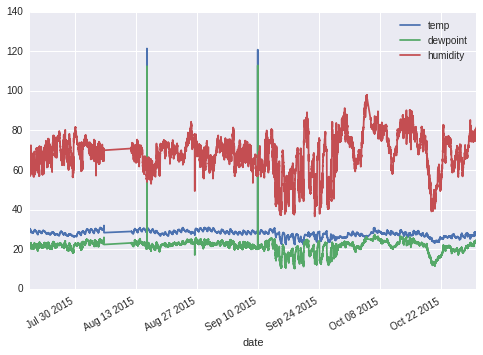

In [13]:
data[['temp', 'dewpoint', 'humidity']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dc3064518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5dc3330160>], dtype=object)

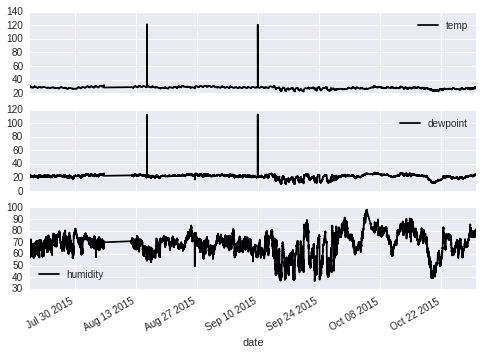

In [14]:
data[['temp', 'dewpoint', 'humidity']].plot(subplots=True)

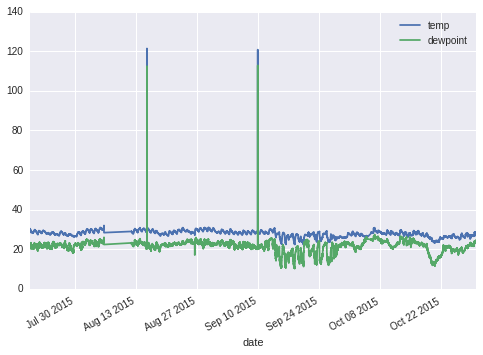

In [15]:
data[['temp', 'dewpoint']].plot()

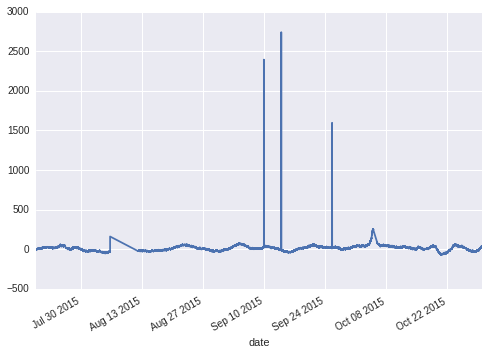

In [16]:
data.altitude.plot()